In [1]:
from PIL import Image
import h5py
import anubisPlotUtils as anPlot
import json
import numpy as np
import os
import hist as hi
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
matplotlib.use('TkAgg')  # or 'Qt5Agg', 'GTK3Agg', etc.
import mplhep as hep
hep.style.use([hep.style.ATLAS])
import sys
import ANUBIS_triggered_functions as ANT
import pandas as pd
import matplotlib.backends.backend_pdf
from matplotlib.ticker import MultipleLocator
import plotly
import plotly.graph_objs as go
import plotly.express as px


%matplotlib inline

Takes around 12 minutes to read data file

In [2]:
current_directory=  os.path.dirname(os.getcwd())

data = ANT.importDatafile(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_0227.h5")

2 hours after initial time is 94230 events.

In [13]:
data_ATLAS = [sublist[:94230] for sublist in data]

In [17]:
etaHits, phiHits = ANT.divideHitCountsByRPC_Timed(data_ATLAS)

In [19]:
#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_ATLAS = ANT.FindCoincidentHits(etaHits,phiHits,15)

#Spatial Clustering
coincident_hits_ATLAS_clustered = ANT.cluster(coincident_hits_ATLAS)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0

In [21]:
print(len(coincident_hits_ATLAS_clustered))

210641


In [24]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events = ANT.filter_events(coincident_hits_ATLAS_clustered,2,3)
print("......")
all_6_rpcs = ANT.filter_events(coincident_hits_ATLAS_clustered,3,6)

Number of events in filter = 27227
......
Number of events in filter = 1334


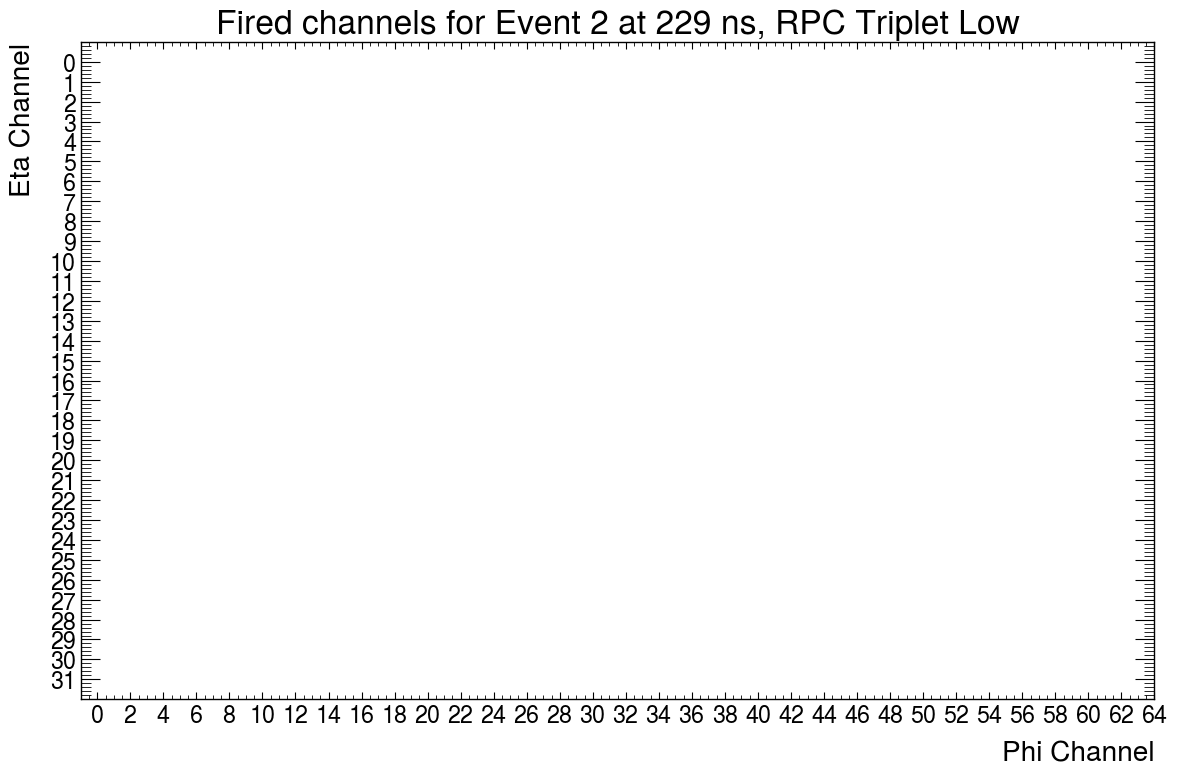

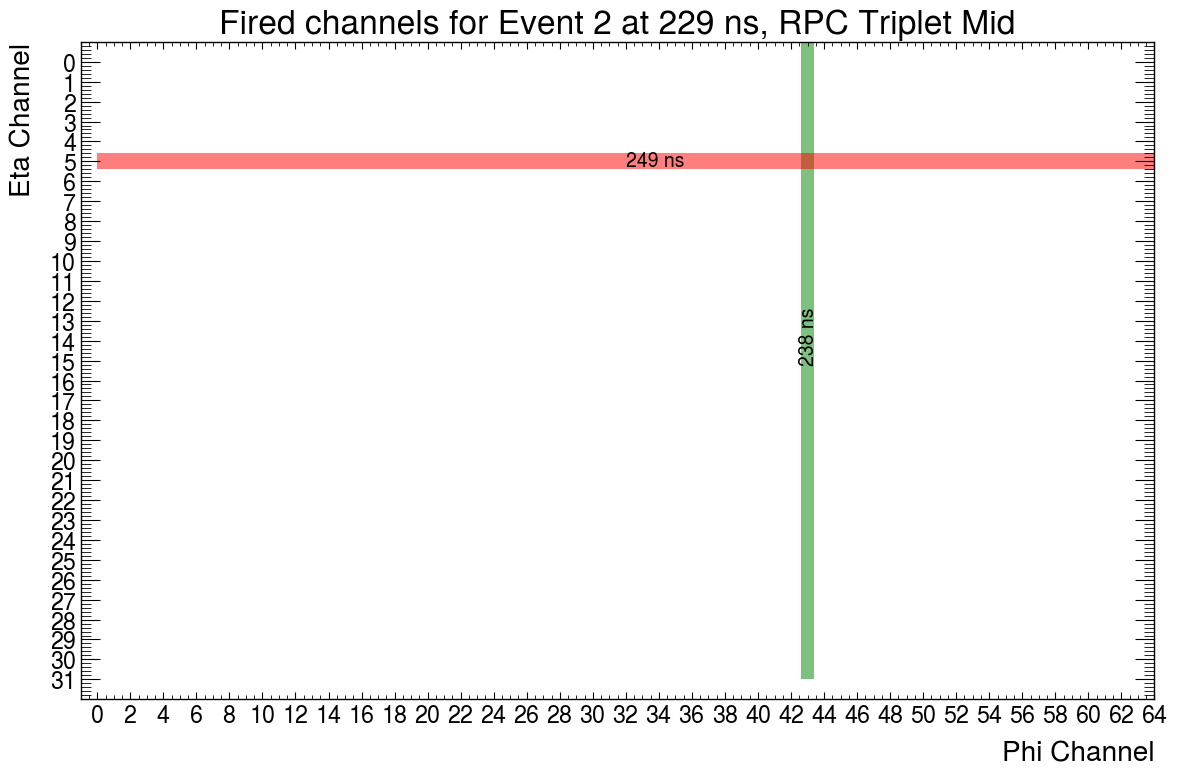

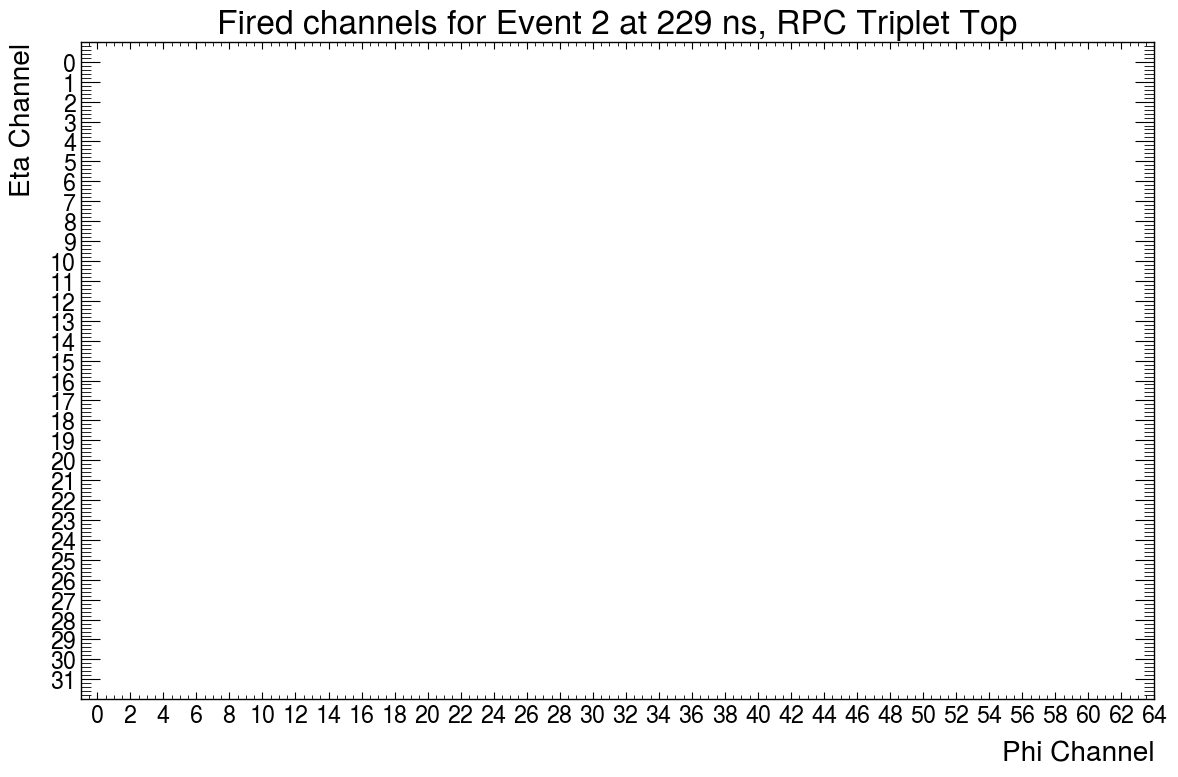

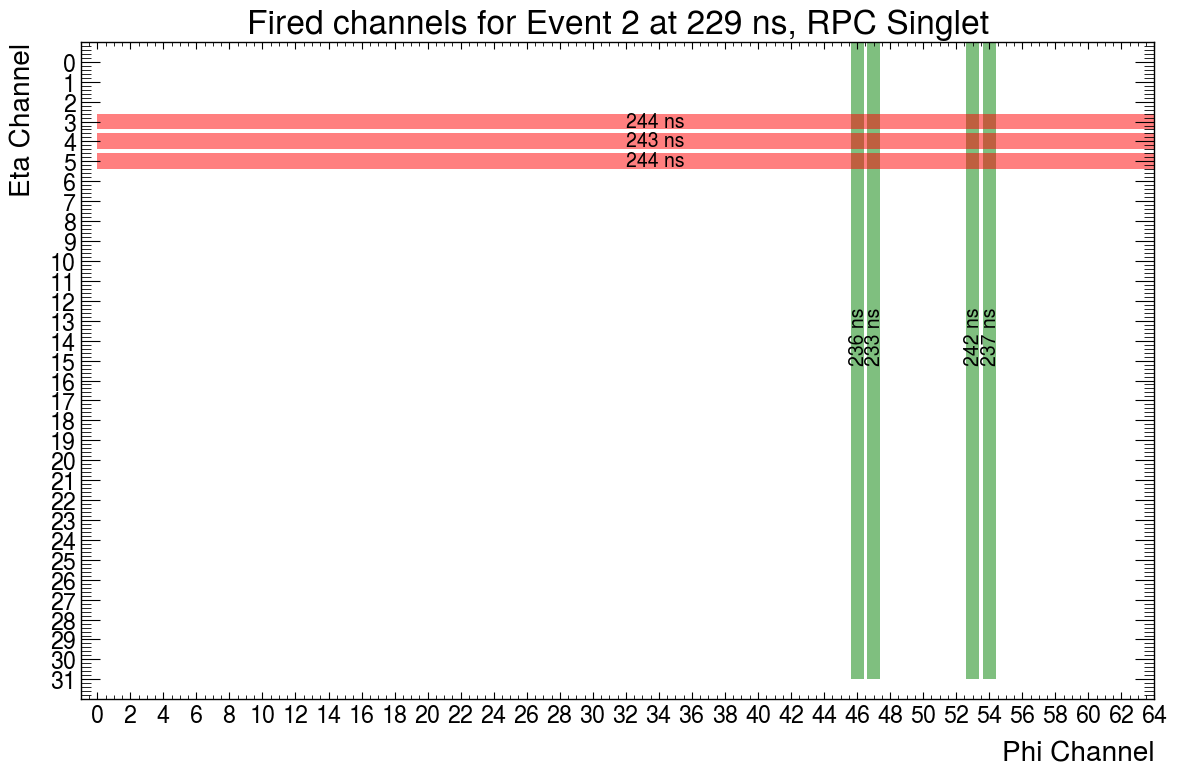

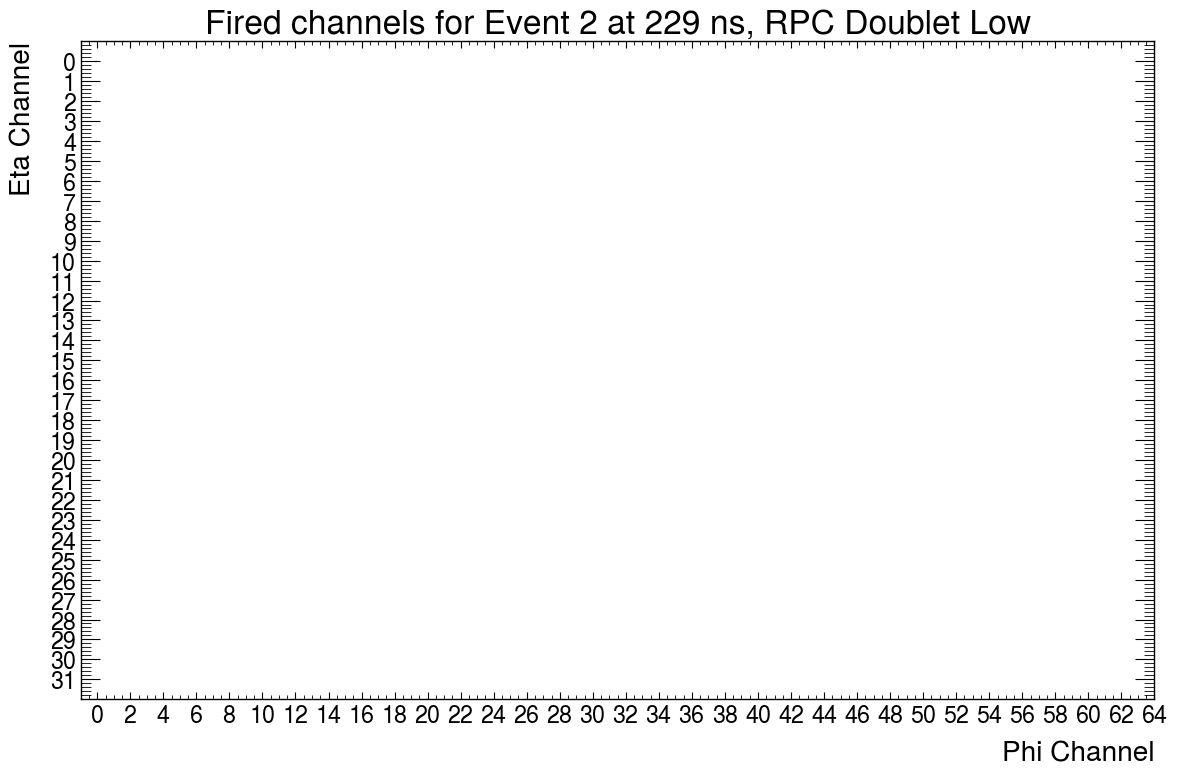

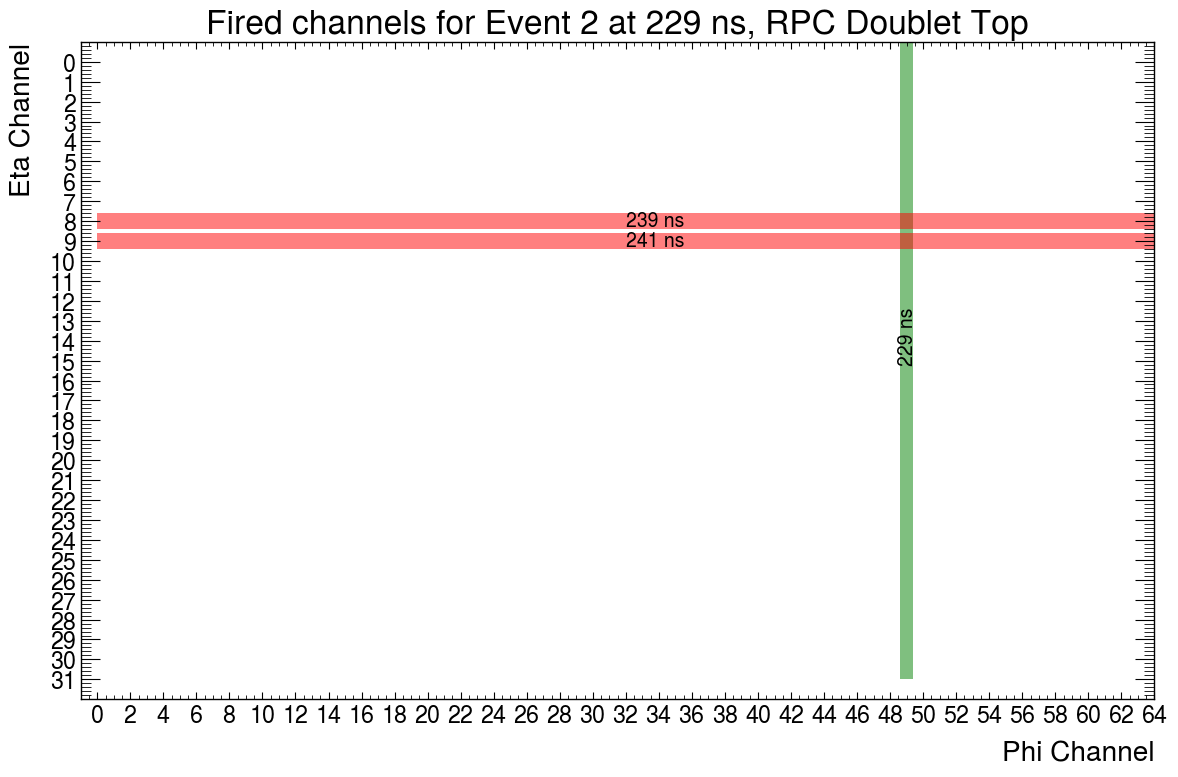

In [25]:
ANT.plot_event_cluster(ANT.convert_cluster_to_plot(cross_chamber_3_rpc_events[0]))

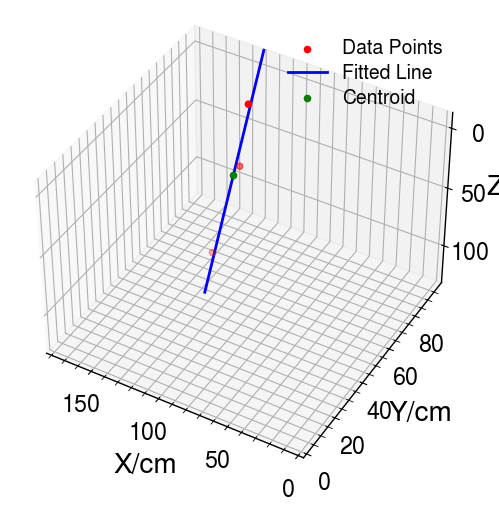

In [29]:
E17_223 = ANT.reconstruct(cross_chamber_3_rpc_events[0],3)

ANT.non_interactive_muon_plot(E17_223[0],E17_223[1],E17_223[2])


In [30]:
ANT.interactive_muon_plot(E17_223[0],E17_223[1],E17_223[2])

In [127]:
def plot_angle_distribution_absolute(angles, title):
    #Plot angular distribution given phi and eta angular distribution separately.
    #Plot absolute number of counts rather than relative occurence.

    plt.figure(figsize=(16,10))

    # Plot histogram with counts
    plt.hist(angles, bins=61, density=False,edgecolor='black',alpha=0.7, label='ProANUBIS muon distribution')

    # Convert radians to degrees for x-ticks
    x_ticks_degrees = np.linspace(-90, 90, num=19)
    x_ticks_radians = np.radians(x_ticks_degrees)

    # Set x-ticks labels and positions
    plt.xticks(x_ticks_radians, x_ticks_degrees)
    
    plt.annotate(f"Number of events = {len(angles)}",(0.2,0.6),xycoords='figure fraction')

    # Customize the plot
    plt.xlabel('Angle/ degrees from axis perpendicular to surface of RPCs')
    plt.ylabel('Number of Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [114]:
angles_eta, angles_phi = ANT.extract_angles_phi_eta(cross_chamber_3_rpc_events)

Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed 

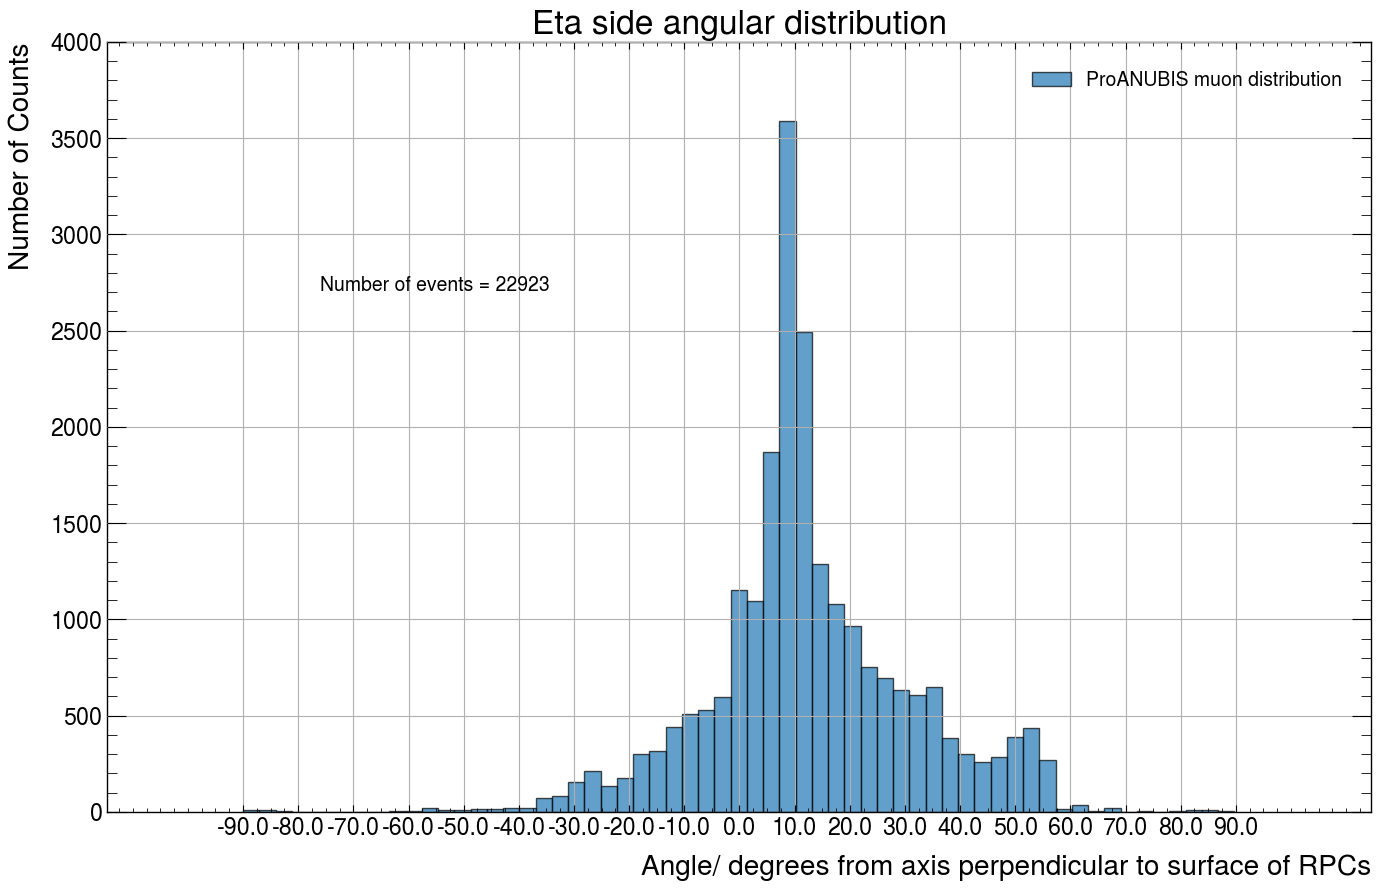

In [128]:
plot_angle_distribution_absolute(angles_eta,"Eta side angular distribution")

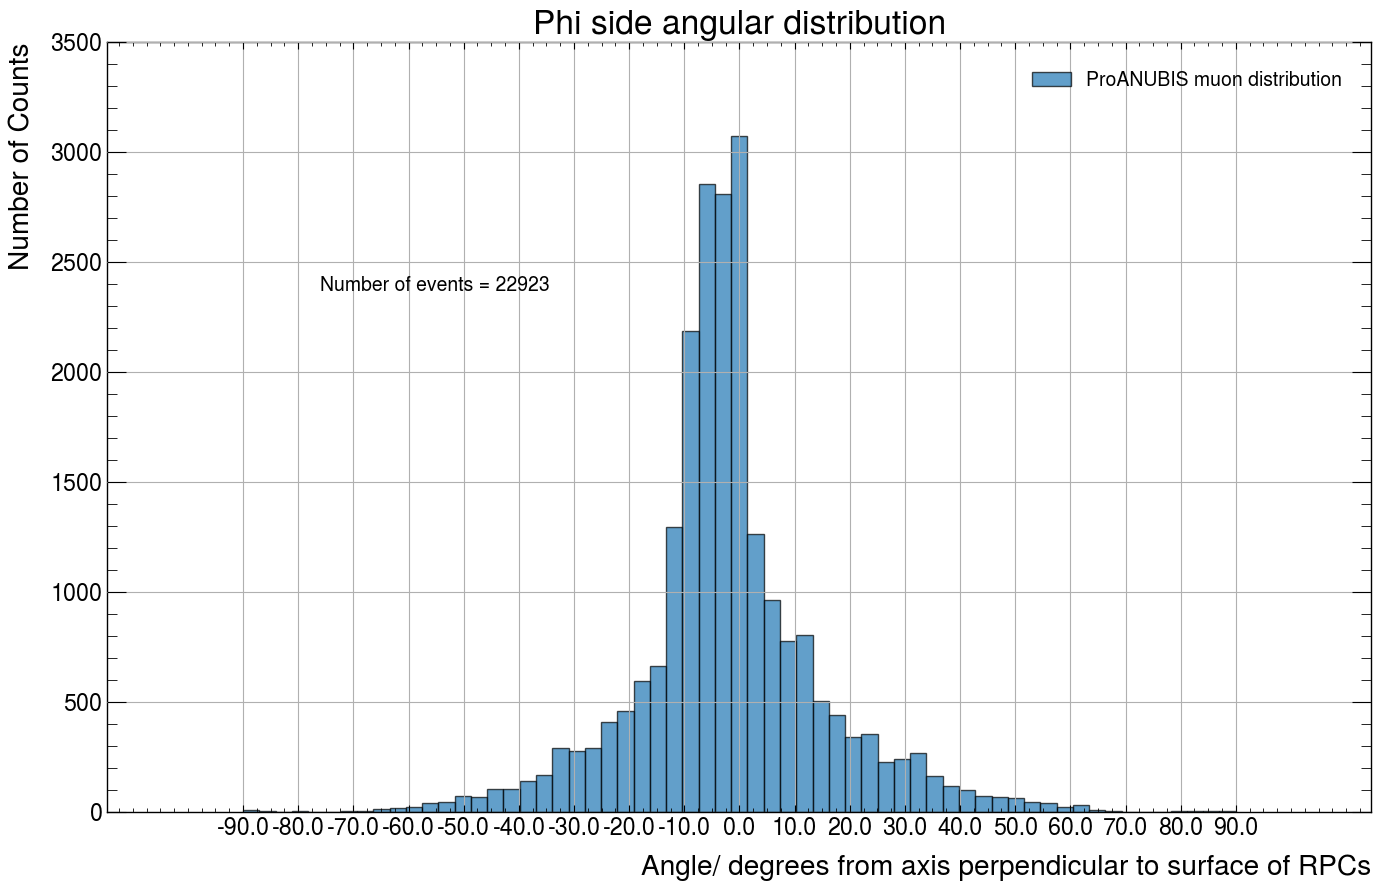

In [129]:
plot_angle_distribution_absolute(angles_phi,"Phi side angular distribution")

In [63]:
def importFromHDF5File(filename):

    inputHDF5 = h5py.File(filename, 'r')  

    data = [[] for _ in range(5)] 

    for event in inputHDF5['data']:

        tdc = event['tdc'] - 60928

        time_ms = event['time_ms']

        thisEvent = {'time_ms': time_ms, 'hits': []}

        for hit in event['words']:

            thisEvent['hits'].append(hit)

        data[tdc].append(thisEvent)

    return data

In [97]:
data_cosmics_test = importFromHDF5File(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_1427_cosmics.h5")

In [100]:
print(data_cosmics_test[0][0])

{'time_ms': 1712147265, 'hits': [135266557, 152043772, 1209008368, 1745879298, 1762656511]}


T0 = 1712147265 seconds after 01/01/1970
Two hours after this would be:
T1 = 1712154465 seconds after 01/01/1970

In [101]:
for idx, i in enumerate(data_cosmics_test[0]):

    if i['time_ms'] >= 1712154465:

        print(idx)

        break

55489


Index of final event within two hours is 55489.

Michael mentioned that one of the timestamps was set to negative, I will now check if this is the case in the 2 hours.

In [103]:
for j in range(5):
    for i in range(55489):
       # print(data_cosmics[j][i]['time_ms'])
        if data_cosmics_test[j][i]['time_ms'] < 0:
            print("negative timestep found")
            break

There does not appear to be a negative timestep anywhere within the range considered, so it is safe to use.

In [71]:
Cosmics = ANT.importFromHDF5File(current_directory+"\\ProAnubisData\\ATLAS LUMINOSITY\\proAnubis_240403_1427_cosmics.h5")

In [104]:
data_cosmics = [sublist[:55489] for sublist in Cosmics]

In [105]:
c_etaHits, c_phiHits = ANT.divideHitCountsByRPC_Timed(data_cosmics)

In [106]:
#Time_window for coincidence set at 15 ns.
#Temporal Clustering
coincident_hits_cosmics = ANT.FindCoincidentHits(c_etaHits,c_phiHits,15)

#Spatial Clustering
coincident_hits_cosmics_clustered = ANT.cluster(coincident_hits_cosmics)

0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
0%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1%
1

In [111]:
print(len(coincident_hits_cosmics_clustered))

128922


In [108]:
#Filter events depending on what you would like to look at.
#filter_events(data,minimum number of chambers hit, minimum number of RPCs hit)
cross_chamber_3_rpc_events_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,2,3)
print("......")
all_6_rpcs_cosmics = ANT.filter_events(coincident_hits_cosmics_clustered,3,6)

Number of events in filter = 9390
......
Number of events in filter = 424


In [109]:
angles_eta_c, angles_phi_c = ANT.extract_angles_phi_eta(cross_chamber_3_rpc_events_cosmics)

Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to reconstruct, not enough coords
Failed to 

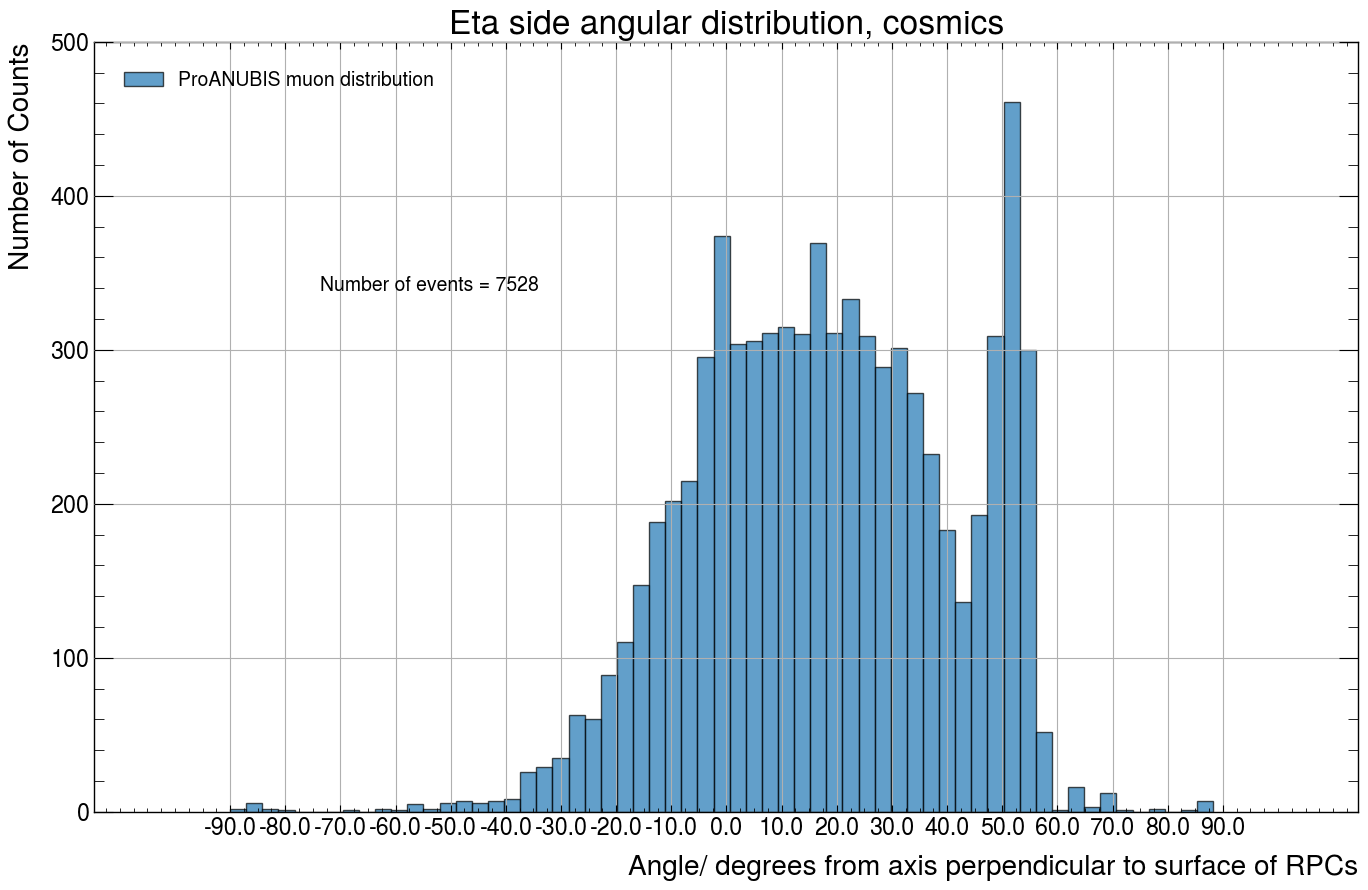

In [130]:
plot_angle_distribution_absolute(angles_eta_c,"Eta side angular distribution, cosmics")

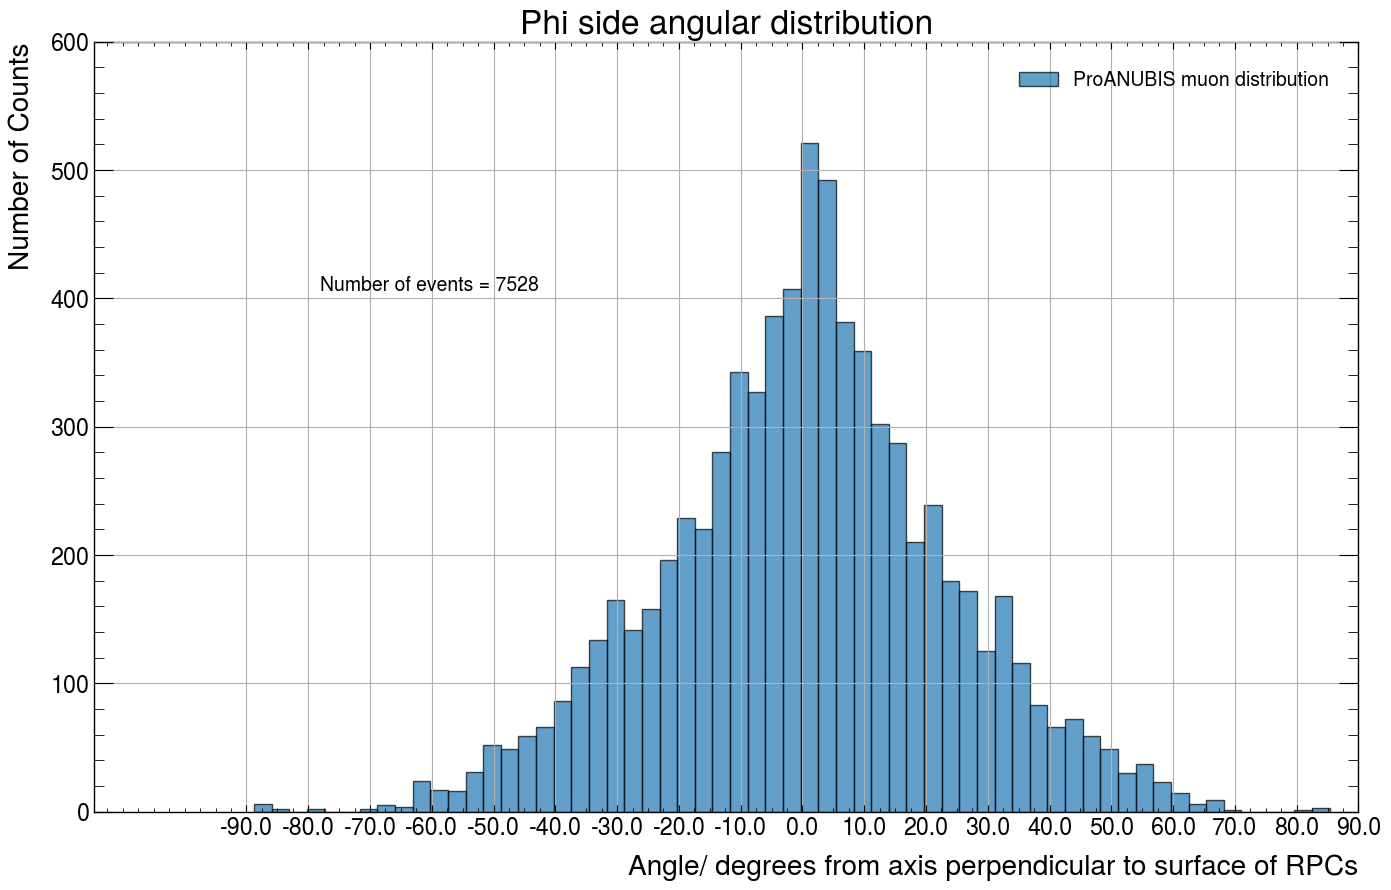

In [131]:
plot_angle_distribution_absolute(angles_phi_c,"Phi side angular distribution")

In [177]:
def plot_angle_distribution_absolute_2(angles1, angles2, title):
    # Flatten the arrays if they are multidimensional
    angles1 = np.asarray(angles1).flatten()
    angles2 = np.asarray(angles2).flatten()

    plt.figure(figsize=(16, 10))

    # Determine the range for the histograms
    angle_range = (-np.pi/2, np.pi/2)  # You can adjust this range based on your data

    # Plot histogram with counts
    plt.hist(angles1, bins=61, range=angle_range, density=False, edgecolor='black',label='ATLAS Luminosity spike, 2 Hours')

    plt.hist(angles2, bins=61, range=angle_range, density=False, edgecolor='black', alpha=0.5, color = 'green', label='Cosmics Only, 2 Hours')


    # Convert radians to degrees for x-ticks
    x_ticks_degrees = np.linspace(-90, 90, num=19)
    x_ticks_radians = np.radians(x_ticks_degrees)

    # Set x-ticks labels and positions
    plt.xticks(x_ticks_radians, x_ticks_degrees)

    # Customize the plot
    plt.xlabel('Angle/ degrees from axis perpendicular to surface of RPCs')
    plt.ylabel('Number of Counts')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

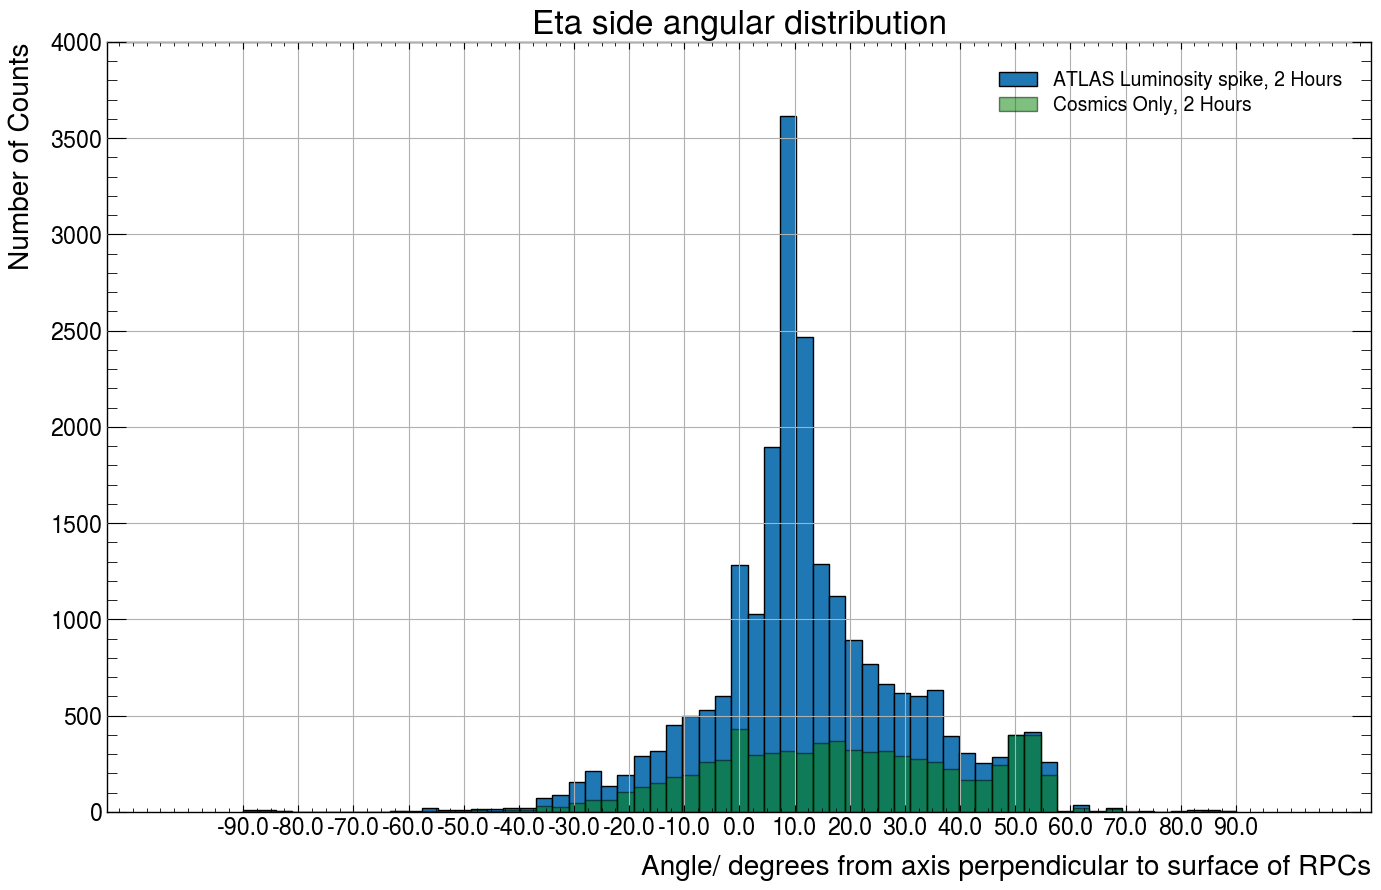

In [178]:
plot_angle_distribution_absolute_2(angles_eta,angles_eta_c,"Eta side angular distribution")

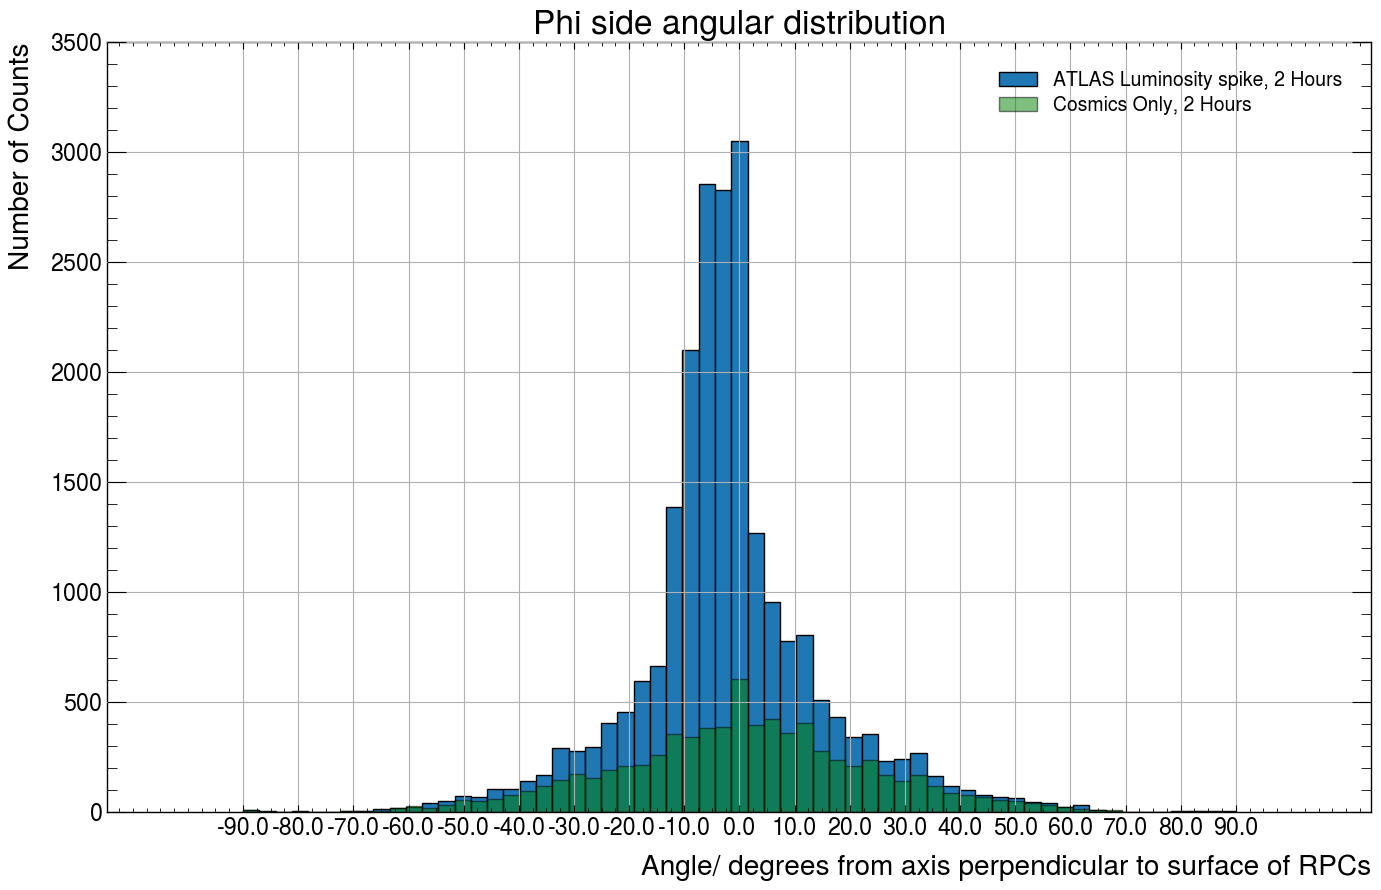

In [179]:
plot_angle_distribution_absolute_2(angles_phi,angles_phi_c,"Phi side angular distribution")